<a href="https://colab.research.google.com/github/ravilon/ufpel-pdi/blob/main/LAB7_Imagens_Coloridas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB7 — Manipulando Imagens Coloridas com OpenCV (cv2)

Disciplina: **Processamento Digital de Imagens (PDI)** – UFPel  
Professor: **Guilherme Corrêa**  

Neste lab vamos manipular imagens coloridas e convertê-las entre diferentes espaços de cores (RGB, HSV, YCbCr).

Vamos utilizar a imagem `tuyuka.png` como exemplo, que está disponível no repositório para os exercícios.

---

## Objetivos  

1. Carregar e manipular imagens coloridas usando OpenCV, observando que a leitura padrão ocorre no formato BGR, enquanto a exibição com matplotlib exige RGB.

2. Converter entre diferentes espaços de cores, especialmente: **RGB**: modelo aditivo mais comum em telas; **HSV**: separa matiz, saturação e brilho, útil em segmentação e realce; **YCbCr**: separa luminância e crominância, muito usado em compressão de vídeo/imagem.
---

Essas operações permitirão entender melhor como cada representação destaca diferentes informações da cena e como manipular cada canal separadamente para fins de processamento de imagens.

## Bibliotecas úteis
Se estiver no Colab, rode a célula de instalação uma única vez.

In [4]:
# (execute uma vez)
!pip -q install ipywidgets==8.1.2 scikit-image==0.24.0 opencv-python-headless==4.10.0.84

import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files



## Upload de uma imagem

Vamos usar `files` do `google.colab` para fazer upload de uma imagem colorida e a biblioteca OpenCV (`cv2`) para abri-la.

Sugestão: utilizar a imagem `tuyuka.png`, que está disponível no repositório para os exercícios. A imagem está no formato RGB.

Faça upload de uma imagem (JPG/PNG).


Saving tuyuka.png to tuyuka (1).png


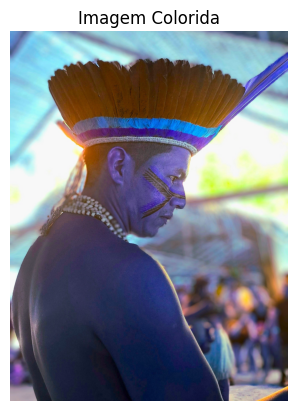

In [16]:
print("Faça upload de uma imagem (JPG/PNG).")
up = files.upload()
if not up:
    raise RuntimeError("Nenhum arquivo enviado.")

# Nome do arquivo
fname = next(iter(up))

# Ler imagem colorida (BGR)
img_bgr = cv2.imdecode(np.frombuffer(up[fname], np.uint8), cv2.IMREAD_COLOR)
if img_bgr is None:
    raise RuntimeError("Falha ao ler a imagem.")

# Mostrar
plt.imshow(img_bgr, vmin=0, vmax=255)
plt.axis('off')
plt.title('Imagem Colorida')
plt.show()

# 🖼️ Tarefa A — Visualizando a imagem RGB

**Você notou que as cores da imagem aberta estão alteradas?**

Isso ocorre porque, por padrão, o OpenCV captura do arquivo os canais de cores das imagens na ordem **BGR** **(Blue, Green, Red)** e não na ordem RGB (Red, Green, Blue).

A imagem armazenada no disco está em formato RGB, mas o canal R está sendo importado como B, o canal G está sendo importado como G e o canal B está sendo importado como R.

O `matplotlib.imshow()` assume automaticamente que a imagem está no formato RGB quando ela possui 3 canais, fazendo com que a visualização da imagem fique alterada.

Para resolver isso, precisamos **trocar os canais R e B na imagem** antes de exibi-la. Para isso, você deve utilizar:

```
cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)
```

**Você deve:**
- Inverter os canais R e B (conversão BGR->RGB);
- Apresentar as duas, lado a lado;
- Separar os canais R, G e B em matrizes bidimensionais;
- Apresentar cada canal separadamente em escala de cinzas (exemplo: `plt.imshow(R,  cmap='gray')`).

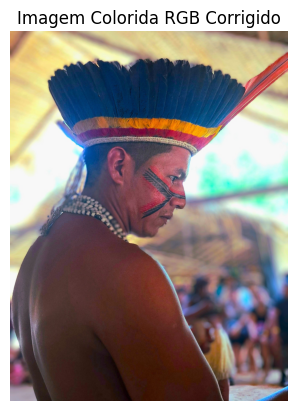

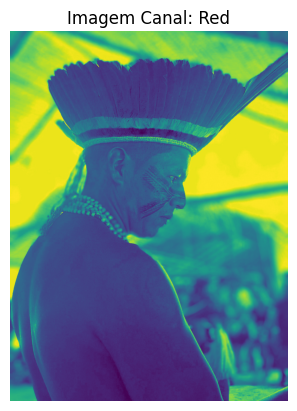

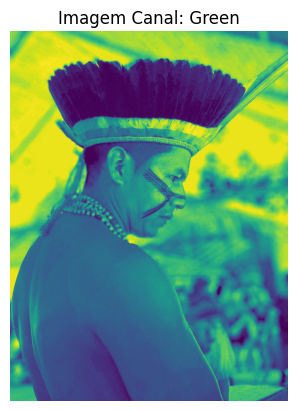

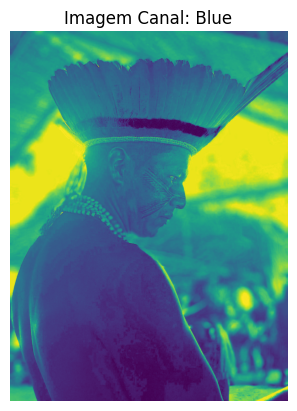

In [18]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_RGB2BGR)

plt.imshow(img_rgb, vmin=0, vmax=255)
plt.axis('off')
plt.title('Imagem Colorida RGB Corrigido')
plt.show()

img_green, img_red, img_blue = cv2.split(img_rgb)

plt.imshow(img_red, vmin=0, vmax=255)
plt.axis('off')
plt.title('Imagem Canal: Red')
plt.show()

plt.imshow(img_green, vmin=0, vmax=255)
plt.axis('off')
plt.title('Imagem Canal: Green')
plt.show()

plt.imshow(img_blue, vmin=0, vmax=255)
plt.axis('off')
plt.title('Imagem Canal: Blue')
plt.show()

# 🖼️ Tarefa B — Transformando a imagem BGR para o espaço HSV

Agora vamos repetir o processo descrito na Tarefa A, mas para o espaço de cores HSV.

**Você deve:**
- Converter de BGR para HSV;
- Apresentar as duas imagens, lado a lado (a imagem HSV vai parecer estranha, mas lembre-se que o `matplotlib.imshow()` assume automaticamente que a imagem está no formato RGB quando ela possui 3 canais);
- Separar os canais H, S e V em matrizes bidimensionais;
- Apresentar cada canal separadamente em escala de cinzas (exemplo: `plt.imshow(H,  cmap='gray')`).

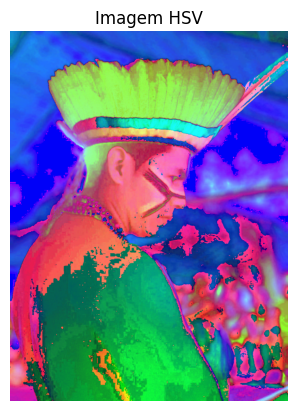

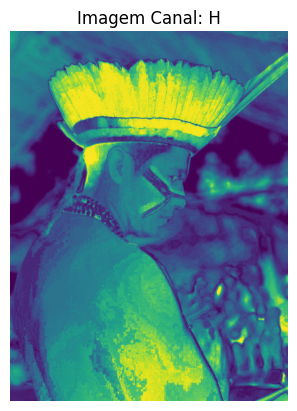

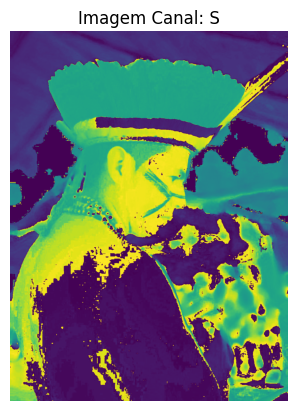

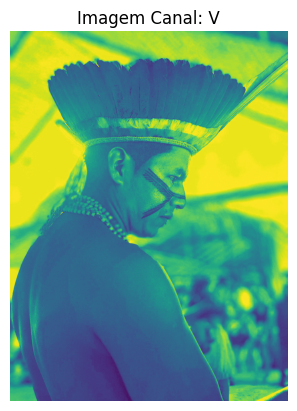

In [22]:
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV_FULL)

plt.imshow(img_hsv, vmin=0, vmax=255)
plt.axis('off')
plt.title('Imagem HSV')
plt.show()

img_s, img_h, img_v = cv2.split(img_hsv)

plt.imshow(img_h, vmin=0, vmax=255)
plt.axis('off')
plt.title('Imagem Canal: H')
plt.show()

plt.imshow(img_s, vmin=0, vmax=255)
plt.axis('off')
plt.title('Imagem Canal: S')
plt.show()

plt.imshow(img_v, vmin=0, vmax=255)
plt.axis('off')
plt.title('Imagem Canal: V')
plt.show()

---
# 🖼️ Tarefa C — Transformando a imagem BGR para o espaço YCbCr

Por fim, vamos repetir o processo, mas para o espaço de cores YCbCr.

**Você deve:**
- Converter de BGR para YCbCr;
- Apresentar as duas imagens, lado a lado (a imagem YCbCr vai parecer estranha, mas lembre-se que o `matplotlib.imshow()` assume automaticamente que a imagem está no formato RGB quando ela possui 3 canais);
- Separar os canais Y, Cb e Cr em matrizes bidimensionais;
- Apresentar cada canal separadamente em escala de cinzas (exemplo: `plt.imshow(Y,  cmap='gray')`).

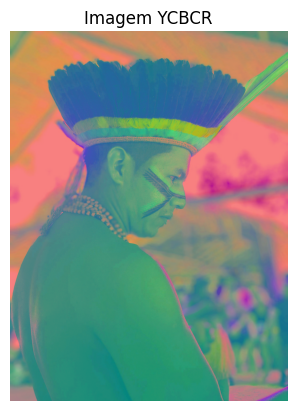

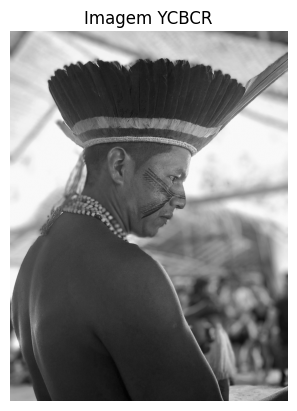

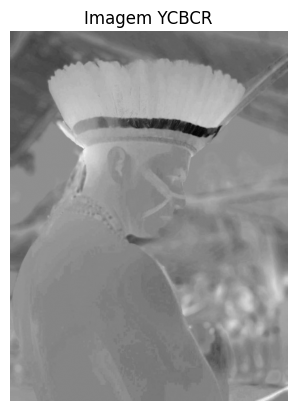

In [25]:
img_ycbr = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2YCrCb)

plt.imshow(img_ycbr, vmin=0, vmax=255)
plt.axis('off')
plt.title('Imagem YCBCR')
plt.show()

img_cb, img_y, img_cr = cv2.split(img_ycbr)

plt.imshow(img_cb,cmap='gray')
plt.axis('off')
plt.title('Imagem YCBCR')
plt.show()

plt.imshow(img_cr, cmap='gray')
plt.axis('off')
plt.title('Imagem YCBCR')
plt.show()